In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [17]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato_dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
    print(label_batch.numpy())

tf.Tensor(
[[[174. 177. 184.]
  [173. 176. 183.]
  [170. 173. 180.]
  ...
  [148. 145. 154.]
  [141. 138. 147.]
  [125. 122. 131.]]

 [[172. 175. 182.]
  [171. 174. 181.]
  [170. 173. 180.]
  ...
  [154. 151. 160.]
  [141. 138. 147.]
  [109. 106. 115.]]

 [[172. 175. 182.]
  [172. 175. 182.]
  [173. 176. 183.]
  ...
  [152. 149. 158.]
  [152. 149. 158.]
  [138. 135. 144.]]

 ...

 [[186. 183. 190.]
  [186. 183. 190.]
  [187. 184. 191.]
  ...
  [121. 116. 123.]
  [129. 124. 131.]
  [135. 130. 137.]]

 [[188. 185. 192.]
  [186. 183. 190.]
  [185. 182. 189.]
  ...
  [132. 127. 134.]
  [127. 122. 129.]
  [117. 112. 119.]]

 [[190. 187. 194.]
  [187. 184. 191.]
  [185. 182. 189.]
  ...
  [120. 115. 122.]
  [119. 114. 121.]
  [114. 109. 116.]]], shape=(256, 256, 3), dtype=float32)
[1 1 0 1 2 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 2 1 1 0 0 0 0 1 1 0 0]


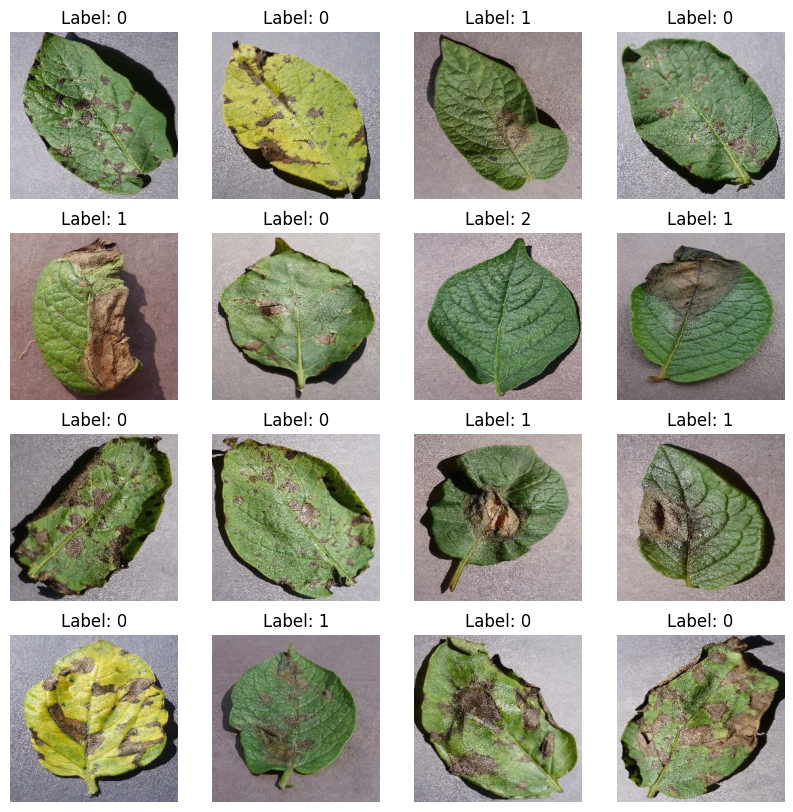

In [7]:

for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))
    num_images = min(len(image_batch), 16)  # Display at most 16 images
    for i in range(num_images):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(f"Label: {label_batch[i]}")
        plt.axis("off")
    plt.show()


In [16]:
model_version = 1
model.save(f"../models/")

NameError: name 'model' is not defined

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
test_ds = dataset.skip(54)
print(len(test_ds))

14


In [10]:
val_ds = test_ds.take(6)
len(test_ds)

14

In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
      
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = ds_size - train_size - val_size

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)
    
    return train_ds, val_ds, test_ds


In [12]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 256)
])


In [15]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Example usage
input_image = tf.random.normal([1, 300, 300, 3])
output_image = data_augmentation(input_image)
print(output_image.shape)

(1, 300, 300, 3)


In [3]:


# Assuming you have defined resize_and_rescale and data_augmentation elsewhere
input_shape = (128, 128, 1)  # Assuming grayscale images (height, width, channels)

model = model.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='softmax')
])


NameError: name 'model' is not defined

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (1, 300, 300, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


ValueError: Exception encountered when calling Resizing.call().

[1mInvalid dtype: tuple[0m

Arguments received by Resizing.call():
  • args=('<KerasTensor shape=(None, 256, 256, 3), dtype=float32, sparse=None, name=keras_tensor_6>',)
  • kwargs=<class 'inspect._empty'>

In [26]:
scores = model.evaluation(test_ds)

AttributeError: 'Sequential' object has no attribute 'evaluation'

In [ ]:
scores
history.params

In [ ]:
acc = history.history['accuaracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training accuaracy')
plt.plot(range(EPOCHS), val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label:", class_first_label)
    
    batch_prediction = model.predict(images_batch)
    print(np.argmax(batch_prediction[0]))

In [4]:
import tensorflow as tf
print(tf.__version__)


2.16.2
